# Sheet04 Solution

Group members - 
1. Aayush Manoj Tirmalle (Matrikel nummer - 4730148)
2. Joshua Ulrich Mulihigoa Mauligalo (Matrikel nummer - 4269797)

### 1. Posterior form in GDA

#### Part (a)

According to Bayes' rule, the posterior probability $p(C = 1 | \mathbf{x})$ can be expressed as:

$$p(C = 1 | \mathbf{x}) = \frac{p(\mathbf{x} | C = 1) p(C = 1)}{p(\mathbf{x})}$$

The marginal probability $p(\mathbf{x})$ can be written as:

$$p(\mathbf{x}) = p(\mathbf{x} | C = 0) p(C = 0) + p(\mathbf{x} | C = 1) p(C = 1)$$

By substituting the given class priors $p(C = 1) = \pi_1$ and $p(C = 0) = \pi_0$, we get:

$$p(C = 1 | \mathbf{x}) = \frac{p(\mathbf{x} | C = 1) \pi_1}{p(\mathbf{x} | C = 0) \pi_0 + p(\mathbf{x} | C = 1) \pi_1}$$

To simplify this expression into the desired form, we can divide both the numerator and the denominator by $p(\mathbf{x} | C = 1) \pi_1$:

$$p(C = 1 | \mathbf{x}) = \frac{1}{\frac{p(\mathbf{x} | C = 0) \pi_0}{p(\mathbf{x} | C = 1) \pi_1} + 1}$$

Let's define a new term $g(\mathbf{x})$ as:

$$g(\mathbf{x}) = -\ln\left(\frac{p(\mathbf{x} | C = 0) \pi_0}{p(\mathbf{x} | C = 1) \pi_1}\right) = \ln\left(\frac{p(\mathbf{x} | C = 1) \pi_1}{p(\mathbf{x} | C = 0) \pi_0}\right)$$

This implies that:

$$e^{-g(\mathbf{x})} = \frac{p(\mathbf{x} | C = 0) \pi_0}{p(\mathbf{x} | C = 1) \pi_1}$$

By substituting this back into the equation for $p(C = 1 | \mathbf{x})$, we arrive at the required form:

$$p(C = 1 | \mathbf{x}) = \frac{1}{1 + e^{-g(\mathbf{x})}}$$

This is the sigmoid function, which is commonly used in logistic regression.

#### Part (b)

From part (a), we have the expression for $g(\mathbf{x})$:

$$g(\mathbf{x}) = \ln p(\mathbf{x} | C = 1) - \ln p(\mathbf{x} | C = 0) + \ln\left(\frac{\pi_1}{\pi_0}\right)$$

The probability density function for a multivariate Gaussian distribution is given by:

$$p(\mathbf{x} | C = k) = \frac{1}{(2\pi)^{D/2} |\Sigma_k|^{1/2}} \exp\left(-\frac{1}{2} (\mathbf{x} - \mu_k)^T \Sigma_k^{-1} (\mathbf{x} - \mu_k)\right)$$

where $D$ is the dimensionality of $\mathbf{x}$.

The natural logarithm of this expression is:

$$\ln p(\mathbf{x} | C = k) = -\frac{D}{2} \ln(2\pi) - \frac{1}{2} \ln|\Sigma_k| - \frac{1}{2} (\mathbf{x} - \mu_k)^T \Sigma_k^{-1} (\mathbf{x} - \mu_k)$$

Now, we can substitute this into the equation for $g(\mathbf{x})$:

$$g(\mathbf{x}) = \left[-\frac{1}{2} \ln|\Sigma_1| - \frac{1}{2} (\mathbf{x} - \mu_1)^T \Sigma_1^{-1} (\mathbf{x} - \mu_1)\right] - \left[-\frac{1}{2} \ln|\Sigma_0| - \frac{1}{2} (\mathbf{x} - \mu_0)^T \Sigma_0^{-1} (\mathbf{x} - \mu_0)\right] + \ln\left(\frac{\pi_1}{\pi_0}\right)$$

Expanding the quadratic terms $(\mathbf{x} - \mu_k)^T \Sigma_k^{-1} (\mathbf{x} - \mu_k)$ gives:

$$\mathbf{x}^T\Sigma_k^{-1}\mathbf{x} - 2\mathbf{x}^T\Sigma_k^{-1}\mu_k + \mu_k^T\Sigma_k^{-1}\mu_k$$

Substituting this back into $g(\mathbf{x})$ yields a general expression that involves both quadratic and linear terms in $\mathbf{x}$.

##### Case 1: Equal Covariances ($\Sigma_0 = \Sigma_1 = \Sigma$)

When the covariance matrices are equal, the terms involving the determinant of the covariance matrix cancel out, as do the quadratic terms $\mathbf{x}^T\Sigma^{-1}\mathbf{x}$:

$$g(\mathbf{x}) = -\frac{1}{2}(-2\mathbf{x}^T\Sigma^{-1}\mu_1 + \mu_1^T\Sigma^{-1}\mu_1) + \frac{1}{2}(-2\mathbf{x}^T\Sigma^{-1}\mu_0 + \mu_0^T\Sigma^{-1}\mu_0) + \ln\left(\frac{\pi_1}{\pi_0}\right)$$
$$g(\mathbf{x}) = \mathbf{x}^T\Sigma^{-1}(\mu_1 - \mu_0) - \frac{1}{2}\mu_1^T\Sigma^{-1}\mu_1 + \frac{1}{2}\mu_0^T\Sigma^{-1}\mu_0 + \ln\left(\frac{\pi_1}{\pi_0}\right)$$

This can be written in the form of a linear function $\mathbf{w}^T\mathbf{x} + b$, where:

$$\mathbf{w} = \Sigma^{-1}(\mu_1 - \mu_0)$$
$$b = -\frac{1}{2}\mu_1^T\Sigma^{-1}\mu_1 + \frac{1}{2}\mu_0^T\Sigma^{-1}\mu_0 + \ln\left(\frac{\pi_1}{\pi_0}\right)$$

Thus, for equal covariances, $g(\mathbf{x})$ is a linear function of $\mathbf{x}$.

##### Case 2: Unequal Covariances ($\Sigma_0 \neq \Sigma_1$)

When the covariances are not equal, the $\mathbf{x}^T\Sigma_k^{-1}\mathbf{x}$ terms do not cancel. The expression for $g(\mathbf{x})$ becomes:

$$g(\mathbf{x}) = -\frac{1}{2}\mathbf{x}^T\Sigma_1^{-1}\mathbf{x} + \mathbf{x}^T\Sigma_1^{-1}\mu_1 - \frac{1}{2}\mu_1^T\Sigma_1^{-1}\mu_1 + \frac{1}{2}\mathbf{x}^T\Sigma_0^{-1}\mathbf{x} - \mathbf{x}^T\Sigma_0^{-1}\mu_0 + \frac{1}{2}\mu_0^T\Sigma_0^{-1}\mu_0 + \frac{1}{2}\ln\left(\frac{|\Sigma_0|}{|\Sigma_1|}\right) + \ln\left(\frac{\pi_1}{\pi_0}\right)$$

This can be arranged into a quadratic form $\mathbf{x}^T\mathbf{A}\mathbf{x} + \mathbf{w}^T\mathbf{x} + b$, where:

$$\mathbf{A} = \frac{1}{2}(\Sigma_0^{-1} - \Sigma_1^{-1})$$
$$\mathbf{w} = \Sigma_1^{-1}\mu_1 - \Sigma_0^{-1}\mu_0$$
$$b = -\frac{1}{2}\mu_1^T\Sigma_1^{-1}\mu_1 + \frac{1}{2}\mu_0^T\Sigma_0^{-1}\mu_0 + \frac{1}{2}\ln\left(\frac{|\Sigma_0|}{|\Sigma_1|}\right) + \ln\left(\frac{\pi_1}{\pi_0}\right)$$

Therefore, for unequal covariances, $g(\mathbf{x})$ is a quadratic function of $\mathbf{x}$. This model is also known as Quadratic Discriminant Analysis (QDA).

#### Part (c)

The posterior probability $p(C = 1 | \mathbf{x})$ is given by the sigmoid function:

$$p(C = 1 | \mathbf{x}) = \frac{1}{1 + e^{-g(\mathbf{x})}}$$

A Gaussian (or normal) distribution has a characteristic bell-shaped curve, and its functional form is a specific type of exponential function. The sigmoid function, on the other hand, produces an "S"-shaped curve. The output of a sigmoid function is always bounded between 0 and 1, which is appropriate for a probability. In contrast, a Gaussian function is not bounded in this way (though its integral over its domain is 1).

The functional form of $p(C = 1 | \mathbf{x})$ is fundamentally different from that of a Gaussian distribution, regardless of whether $g(\mathbf{x})$ is a linear or a quadratic function of $\mathbf{x}$. Applying a sigmoid transformation to a linear or quadratic function does not result in a Gaussian function.

Therefore, $p(C = 1 | \mathbf{x})$ is **not** Gaussian in $\mathbf{x}$ in either of the cases considered.

### 2. Trees and Random Forests

#### Part (a)

First, let's calculate the impurity of the parent node (400, 400).
*   $p(c=1) = 400/800 = 0.5$
*   $p(c=2) = 400/800 = 0.5$

Parent Node Impurity:
*   Misclassification Rate: $1 - \max(0.5, 0.5) = 0.5$
*   Gini Impurity: $1 - (0.5^2 + 0.5^2) = 1 - 0.5 = 0.5$
*   Entropy: $-(0.5 \log_2(0.5) + 0.5 \log_2(0.5)) = - (0.5 \cdot (-1) + 0.5 \cdot (-1)) = 1$

**Calculating impurity for each split**

Split A: Creates nodes (300, 100) and (100, 300)

*   *Node 1*: (300, 100). Total $N_1 = 400$.
    *   $p(c=1) = 300/400 = 0.75$, $p(c=2) = 100/400 = 0.25$
    *   Misclassification: $1 - 0.75 = 0.25$
    *   Gini: $1 - (0.75^2 + 0.25^2) = 1 - (0.5625 + 0.0625) = 0.375$
    *   Entropy: $-(0.75 \log_2(0.75) + 0.25 \log_2(0.25)) \approx - (0.75 \cdot (-0.415) + 0.25 \cdot (-2)) \approx 0.811$

*   *Node 2:* (100, 300). Total $N_2 = 400$.
    *   $p(c=1) = 100/400 = 0.25$, $p(c=2) = 300/400 = 0.75$
    *   Misclassification: $1 - 0.75 = 0.25$
    *   Gini: $1 - (0.25^2 + 0.75^2) = 0.375$
    *   Entropy: $-(0.25 \log_2(0.25) + 0.75 \log_2(0.75)) \approx 0.811$

*Weighted Impurity for Split A:*

The weights for the nodes are $W_1 = 400/800 = 0.5$ and $W_2 = 400/800 = 0.5$.
*   *Misclassification Rate:* $0.5 \cdot 0.25 + 0.5 \cdot 0.25 = \textbf{0.25}$
*   *Gini Impurity:* $0.5 \cdot 0.375 + 0.5 \cdot 0.375 = \textbf{0.375}$
*   *Entropy:* $0.5 \cdot 0.811 + 0.5 \cdot 0.811 = \textbf{0.811}$

Split B: Creates nodes (200, 0) and (200, 400)

*   *Node 1:* (200, 0). Total $N_1 = 200$. This is a pure node.
    *   $p(c=1) = 200/200 = 1$, $p(c=2) = 0$
    *   Misclassification: $1 - 1 = 0$
    *   Gini: $1 - (1^2 + 0^2) = 0$
    *   Entropy: $-(1 \log_2(1) + 0 \cdot \text{anything}) = 0$

*   *Node 2:* (200, 400). Total $N_2 = 600$.
    *   $p(c=1) = 200/600 = 1/3$, $p(c=2) = 400/600 = 2/3$
    *   Misclassification: $1 - 2/3 = 1/3 \approx 0.333$
    *   Gini: $1 - ((1/3)^2 + (2/3)^2) = 1 - (1/9 + 4/9) = 4/9 \approx 0.444$
    *   Entropy: $-((1/3) \log_2(1/3) + (2/3) \log_2(2/3)) \approx -((1/3) \cdot (-1.585) + (2/3) \cdot (-0.585)) \approx 0.918$

*Weighted Impurity for Split B:*
The weights for the nodes are $W_1 = 200/800 = 0.25$ and $W_2 = 600/800 = 0.75$.
*   *Misclassification Rate:* $0.25 \cdot 0 + 0.75 \cdot (1/3) = \textbf{0.25}$
*   *Gini Impurity:* $0.25 \cdot 0 + 0.75 \cdot (4/9) = (3/4) \cdot (4/9) = 1/3 \approx \textbf{0.333}$
*   *Entropy:* $0.25 \cdot 0 + 0.75 \cdot 0.918 \approx \textbf{0.689}$

##### Conclusion

| Criterion | Split A | Split B | Preferred Split |
| :--- | :---: | :---: | :---: |
| Misclassification | 0.250 | 0.250 | **Indifferent** |
| Gini Impurity | 0.375 | **0.333** | **Split B** |
| Entropy | 0.811 | **0.689** | **Split B** |

#### Part (b): Calculate Optimal Splits

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def calculate_metrics(y):
    """Calculates misclassification, gini, and entropy for a set of labels."""
    n_samples = len(y)
    if n_samples == 0:
        return 0, 0, 0

    _, counts = np.unique(y, return_counts=True)
    proportions = counts / n_samples

    misclassification = 1 - np.max(proportions)

    gini = 1 - np.sum(proportions**2)

    entropy = -np.sum([p * np.log2(p) for p in proportions if p > 0])

    return misclassification, gini, entropy

In [8]:
def find_best_split(X, y):
    """
    Finds the best split for a 1D dataset according to three criteria.
    """
    n_samples = len(y)
    if n_samples < 2:
        return None

    # Sort data along the feature axis
    sort_idx = np.argsort(X)
    X_sorted, y_sorted = X[sort_idx], y[sort_idx]

    # Initialize dictionaries to store best scores and split points
    best_split = {
        'misclassification': {'score': np.inf, 'threshold': 0},
        'gini': {'score': np.inf, 'threshold': 0},
        'entropy': {'score': np.inf, 'threshold': 0}
    }

    # Iterate through all possible split points
    for i in range(1, n_samples):
        # Split data into left and right nodes
        y_left, y_right = y_sorted[:i], y_sorted[i:]

        # Calculate metrics for children
        m_left, g_left, e_left = calculate_metrics(y_left)
        m_right, g_right, e_right = calculate_metrics(y_right)

        # Calculate weighted average of impurities
        w_left, w_right = len(y_left) / n_samples, len(y_right) / n_samples
        
        misclassification_score = w_left * m_left + w_right * m_right
        gini_score = w_left * g_left + w_right * g_right
        entropy_score = w_left * e_left + w_right * e_right

        # Define split threshold as the midpoint between two consecutive points
        threshold = (X_sorted[i - 1] + X_sorted[i]) / 2

        # Check if this split is the best so far for each metric
        if misclassification_score < best_split['misclassification']['score']:
            best_split['misclassification']['score'] = misclassification_score
            best_split['misclassification']['threshold'] = threshold
        
        if gini_score < best_split['gini']['score']:
            best_split['gini']['score'] = gini_score
            best_split['gini']['threshold'] = threshold

        if entropy_score < best_split['entropy']['score']:
            best_split['entropy']['score'] = entropy_score
            best_split['entropy']['threshold'] = threshold
            
    return best_split

Best split for Misclassification:
  Threshold = 0.6149
  Score = 0.1967

Best split for Gini:
  Threshold = 1.7080
  Score = 0.2972

Best split for Entropy:
  Threshold = 1.8162
  Score = 0.6119



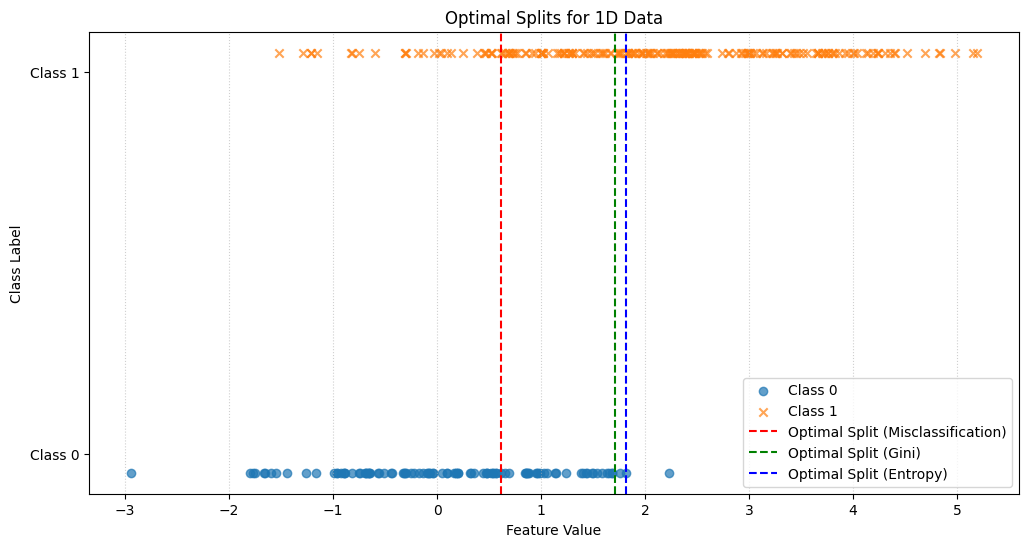

In [9]:
X = np.load('./data/data1d.npy')
y = np.load('./data/labels1d.npy')

# Find the optimal splits
best_splits = find_best_split(X, y)

for criterion, result in best_splits.items():
    print(f"Best split for {criterion.capitalize()}:")
    print(f"  Threshold = {result['threshold']:.4f}")
    print(f"  Score = {result['score']:.4f}\n")

plt.figure(figsize=(12, 6))
plt.scatter(X[y==0], y[y==0] - 0.05, alpha=0.7, label='Class 0', marker='o')
plt.scatter(X[y==1], y[y==1] + 0.05, alpha=0.7, label='Class 1', marker='x')

colors = {'misclassification': 'r', 'gini': 'g', 'entropy': 'b'}
for criterion, result in best_splits.items():
    plt.axvline(
        x=result['threshold'], 
        color=colors[criterion], 
        linestyle='--', 
        label=f'Optimal Split ({criterion.capitalize()})'
    )

plt.title('Optimal Splits for 1D Data')
plt.xlabel('Feature Value')
plt.ylabel('Class Label')
plt.yticks([0, 1], ['Class 0', 'Class 1'])
plt.legend()
plt.grid(axis='x', linestyle=':', alpha=0.6)
plt.show()


#### Part (c): Random Forests for Jet Tagging

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

In [ ]:
# --- (i) Load and split the data ---

# Define the path to data files
data_path = "../sheet01/data/"

try:
    # Load the features and labels from the provided .npy files
    X = np.load(data_path + "dijet_features.npy") 
    y = np.load(data_path + "dijet_labels.npy")
    print("Successfully loaded the jet tagging data.")

    X = X.T
    
    print(f"\nVerifying data shapes after transpose...")
    print(f"  Features shape (X): {X.shape}")
    print(f"  Labels shape (y):   {y.shape}")

    if X.shape[0] != y.shape[0]:
        raise ValueError("Inconsistent number of samples between features and labels!")

except FileNotFoundError:
    print(f"Error: Make sure the files 'dijet_features.npy' and 'dijet_labels.npy' are in the '{data_path}' directory.")
    exit()
except ValueError as e:
    print(f"\nError: {e}")
    exit()


# Define dataset sizes as per the problem description
n_test = 200
n_validation = 200

# First split: Separate the test set (200 samples) from the rest
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=n_test, random_state=42, stratify=y)

# Second split: Separate the validation set (200 samples) from the training set
val_size_fraction = n_validation / len(X_train_val)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=val_size_fraction, random_state=42, stratify=y_train_val)

print("\nData shapes after splitting:")
print(f"  Training set:   {X_train.shape}")
print(f"  Validation set: {X_val.shape}")
print(f"  Test set:       {X_test.shape}")
print("-" * 40)

Successfully loaded the jet tagging data.

Verifying data shapes after transpose...
  Features shape (X): (2233, 116)
  Labels shape (y):   (2233,)

Data shapes after splitting:
  Training set:   (1833, 116)
  Validation set: (200, 116)
  Test set:       (200, 116)
----------------------------------------


In [12]:
# --- (ii) Hyperparameter tuning on the validation set ---
param_grid = {
    'n_estimators': [5, 10, 20, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 5, 10, None]
}

best_score = -1
best_params = {}

print("\nStarting hyperparameter tuning...\n")

for n_trees in param_grid['n_estimators']:
    for criterion in param_grid['criterion']:
        for depth in param_grid['max_depth']:
            model = RandomForestClassifier(
                n_estimators=n_trees,
                criterion=criterion,
                max_depth=depth,
                random_state=42,
                n_jobs=-1
            )
            model.fit(X_train, y_train)
            score = accuracy_score(y_val, model.predict(X_val))
            current_params = {'n_estimators': n_trees, 'criterion': criterion, 'max_depth': 'pure' if depth is None else depth}
            print(f"Params: {current_params}, Validation Accuracy: {score:.4f}")

            if score > best_score:
                best_score = score
                best_params = {'n_estimators': n_trees, 'criterion': criterion, 'max_depth': depth}

print("\n" + "-" * 40)
print(f"Best validation accuracy: {best_score:.4f}")
printable_best_params = best_params.copy()
if printable_best_params['max_depth'] is None:
    printable_best_params['max_depth'] = 'pure'
print(f"Preferred hyperparameters: {printable_best_params}")
print("-" * 40)



Starting hyperparameter tuning...

Params: {'n_estimators': 5, 'criterion': 'gini', 'max_depth': 2}, Validation Accuracy: 0.7100
Params: {'n_estimators': 5, 'criterion': 'gini', 'max_depth': 5}, Validation Accuracy: 0.7400
Params: {'n_estimators': 5, 'criterion': 'gini', 'max_depth': 10}, Validation Accuracy: 0.7300
Params: {'n_estimators': 5, 'criterion': 'gini', 'max_depth': 'pure'}, Validation Accuracy: 0.7050
Params: {'n_estimators': 5, 'criterion': 'entropy', 'max_depth': 2}, Validation Accuracy: 0.7100
Params: {'n_estimators': 5, 'criterion': 'entropy', 'max_depth': 5}, Validation Accuracy: 0.7250
Params: {'n_estimators': 5, 'criterion': 'entropy', 'max_depth': 10}, Validation Accuracy: 0.7550
Params: {'n_estimators': 5, 'criterion': 'entropy', 'max_depth': 'pure'}, Validation Accuracy: 0.7050
Params: {'n_estimators': 10, 'criterion': 'gini', 'max_depth': 2}, Validation Accuracy: 0.7300
Params: {'n_estimators': 10, 'criterion': 'gini', 'max_depth': 5}, Validation Accuracy: 0.765

In [13]:
# --- (iii) Final evaluation on the test set ---

print("\nTraining final model with preferred hyperparameters...")
final_model = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    criterion=best_params['criterion'],
    max_depth=best_params['max_depth'],
    random_state=42,
    n_jobs=-1
)
final_model.fit(X_train, y_train)

y_pred_test = final_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("\n--- Final Performance on the Test Set ---")
print(f"Test Accuracy: {test_accuracy:.4f}\n")
print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred_test, digits=4))


Training final model with preferred hyperparameters...

--- Final Performance on the Test Set ---
Test Accuracy: 0.7750

Classification Report on Test Set:
              precision    recall  f1-score   support

         0.0     0.7228    0.8111    0.7644        90
         1.0     0.7424    0.6364    0.6853        77
         2.0     1.0000    1.0000    1.0000        33

    accuracy                         0.7750       200
   macro avg     0.8217    0.8158    0.8166       200
weighted avg     0.7761    0.7750    0.7728       200



### 3. Underdetermined linear regression

#### Matrix Formulation

First, let's formalize the problem. The model is $y_i = [1, \mathbf{x}_i^T]\mathbf{w}$. We can define a new feature vector $\tilde{\mathbf{x}}_i^T = [1, \mathbf{x}_i^T]$ which includes the bias term. The weight vector $\mathbf{w}$ is in $\mathbb{R}^p$.

The condition for the perfect solution space, $\mathcal{E}(\mathbf{w}) = 0$, means the model fits every data point perfectly:
$y_i = \tilde{\mathbf{x}}_i^T \mathbf{w}$ for all $i = 1, \dots, n$.

This is a system of $n$ linear equations in $p$ variables. We can write this in matrix form as:

$\mathbf{Xw} = \mathbf{y}$

where:
*   $\mathbf{X}$ is the $n \times p$ *design matrix*, where the $i$-th row is $\tilde{\mathbf{x}}_i^T$.
*   $\mathbf{w}$ is the $p \times 1$ weight vector.
*   $\mathbf{y}$ is the $n \times 1$ vector of target values.

The assumption that the observations $\{\mathbf{x}_i\}$ are in "general position" means that the rows of $\mathbf{X}$ are linearly independent. Since $n < p$ in an underdetermined system, this implies that the rank of $\mathbf{X}$ is $n$.

#### (a) Describe the nature of the perfect solution space S

The perfect solution space $S$ is the set of all vectors $\mathbf{w}$ that solve the linear system $\mathbf{Xw} = \mathbf{y}$.

*Geometry and Dimension:*
From linear algebra, the solution set to a consistent system of linear equations is an affine subspace. Its dimension is determined by the dimension of the null space of the matrix $\mathbf{X}$.

By the rank-nullity theorem, for the $n \times p$ matrix $\mathbf{X}$:
`rank(X) + dim(Null(X)) = p`

Given $n=5$ and `rank(X) = n = 5`, we have:
`dim(Null(X)) = p - 5`

The dimension of the affine solution space $S$ is equal to `dim(Null(X))`. Let's analyze the given cases for $p$:

*   *Case p = 4 (Overdetermined):* Here, $p < n$. We have 5 equations and only 4 variables. Since the observations are in general position, the system is inconsistent. There is no vector $\mathbf{w}$ that can satisfy all 5 equations simultaneously.
    *   *Geometry:* The solution space $S$ is the *empty set*, $\emptyset$.
    *   *Dimension:* Not applicable (or -1 by convention).

*   *Case p = 5 (Determined):* Here, $p = n = 5$. The matrix $\mathbf{X}$ is a $5 \times 5$ square matrix. Since its rank is 5, it is invertible. The system has a single, unique solution given by $\mathbf{w} = \mathbf{X}^{-1}\mathbf{y}$.
    *   *Geometry:* The solution space $S$ is a *single point* in $\mathbb{R}^5$.
    *   *Dimension:* 0.

*   *Case p = 6 (Underdetermined):* Here, $p > n$. The system has infinitely many solutions.
    *   *Dimension:* `dim(S) = p - n = 6 - 5 = 1`.
    *   *Geometry:* The solution space $S$ is a *line* (a 1-dimensional affine subspace) in $\mathbb{R}^6$.

*   *Case p = 7 (Underdetermined):* Here, $p > n$. The system has infinitely many solutions.
    *   *Dimension:* `dim(S) = p - n = 7 - 5 = 2`.
    *   *Geometry:* The solution space $S$ is a *plane* (a 2-dimensional affine subspace) in $\mathbb{R}^7$.

#### (b) Prove the set of solutions follows a Gaussian distribution

Let $\mathbf{w}_0 \sim \mathcal{N}(0, \mathbf{I})$ be the random initialization. When we perform gradient descent on the mean squared error (a convex quadratic objective), the algorithm will converge to a point in the solution space $S$ that is closest to the initialization point $\mathbf{w}_0$.

This means the final solution, let's call it $\mathbf{w}^*$, is the orthogonal projection of $\mathbf{w}_0$ onto the affine subspace $S$.

An orthogonal projection is a linear transformation. An affine transformation of a Gaussian random variable is also a Gaussian random variable. We can prove this by deriving the explicit form of the projection.

The vector from the initialization to the solution, $\mathbf{w}^* - \mathbf{w}_0$, must be orthogonal to the solution space $S$. This means it must lie in the row space of $\mathbf{X}$, which is the orthogonal complement of the null space of $\mathbf{X}$. Therefore, we can write:
$\mathbf{w}^* - \mathbf{w}_0 = \mathbf{X}^T \mathbf{z}$ for some vector $\mathbf{z} \in \mathbb{R}^n$.

Rearranging gives:
$\mathbf{w}^* = \mathbf{w}_0 + \mathbf{X}^T \mathbf{z}$

We also know that $\mathbf{w}^*$ must be a solution, so $\mathbf{Xw}^* = \mathbf{y}$. Substituting the expression for $\mathbf{w}^*$:
$\mathbf{X}(\mathbf{w}_0 + \mathbf{X}^T \mathbf{z}) = \mathbf{y}$
$\mathbf{Xw}_0 + (\mathbf{XX}^T)\mathbf{z} = \mathbf{y}$

Since $\mathbf{X}$ has full row rank $n$, the $n \times n$ matrix $\mathbf{XX}^T$ is invertible. We can solve for $\mathbf{z}$:
$\mathbf{z} = (\mathbf{XX}^T)^{-1}(\mathbf{y} - \mathbf{Xw}_0)$

Now, substitute $\mathbf{z}$ back into the expression for $\mathbf{w}^*$:
$\mathbf{w}^* = \mathbf{w}_0 + \mathbf{X}^T (\mathbf{XX}^T)^{-1}(\mathbf{y} - \mathbf{Xw}_0)$
$\mathbf{w}^* = (\mathbf{I} - \mathbf{X}^T (\mathbf{XX}^T)^{-1}\mathbf{X})\mathbf{w}_0 + \mathbf{X}^T (\mathbf{XX}^T)^{-1}\mathbf{y}$

This is an affine transformation of $\mathbf{w}_0$ of the form $\mathbf{w}^* = \mathbf{A}\mathbf{w}_0 + \mathbf{b}$, where:
*   $\mathbf{A} = \mathbf{I} - \mathbf{X}^T (\mathbf{XX}^T)^{-1}\mathbf{X}$
*   $\mathbf{b} = \mathbf{X}^T (\mathbf{XX}^T)^{-1}\mathbf{y}$

Since $\mathbf{w}_0$ is a Gaussian random variable and $\mathbf{w}^*$ is an affine transformation of $\mathbf{w}_0$, the resulting distribution of solutions $\mathbf{w}^*$ is also Gaussian.

#### (c) Characterize the mean of that distribution

The mean of the distribution of $\mathbf{w}^*$ is given by the expectation $E[\mathbf{w}^*]$.
$E[\mathbf{w}^*] = E[\mathbf{A}\mathbf{w}_0 + \mathbf{b}]$
$E[\mathbf{w}^*] = \mathbf{A}E[\mathbf{w}_0] + \mathbf{b}$

Since the initialization $\mathbf{w}_0$ has a mean of 0 ($E[\mathbf{w}_0] = \mathbf{0}$), this simplifies to:
$E[\mathbf{w}^*] = \mathbf{b} = \mathbf{X}^T (\mathbf{XX}^T)^{-1}\mathbf{y}$

This expression is the definition of the Moore-Penrose pseudoinverse $\mathbf{X}^+$ for a wide matrix $\mathbf{X}$ with full row rank.
$\mathbf{X}^+ = \mathbf{X}^T (\mathbf{XX}^T)^{-1}$

So, the mean of the solution distribution is:
$\boldsymbol{\mu}_{\mathbf{w}^*} = \mathbf{X}^+ \mathbf{y}$

*Geometric Interpretation:* The vector $\mathbf{X}^+\mathbf{y}$ is the unique solution to $\mathbf{Xw}=\mathbf{y}$ that has the minimum Euclidean norm ($\|\mathbf{w}\|$). It is the point in the affine solution space $S$ that is closest to the origin. Since our initializations $\mathbf{w}_0$ are sampled from a distribution centered at the origin, it is intuitive that the average of their projections onto $S$ would be the point in $S$ closest to the origin.

#### (d) Characterize the covariance of that distribution

The covariance of the affine transformation is given by $\text{Cov}(\mathbf{A}\mathbf{w}_0 + \mathbf{b}) = \mathbf{A} \text{Cov}(\mathbf{w}_0) \mathbf{A}^T$.

We are given that $\text{Cov}(\mathbf{w}_0) = \mathbf{I}$ (from $\mathbf{w}_0 \sim \mathcal{N}(0, \mathbf{I})$).
$\boldsymbol{\Sigma}_{\mathbf{w}^*} = \text{Cov}(\mathbf{w}^*) = \mathbf{A} \mathbf{I} \mathbf{A}^T = \mathbf{A} \mathbf{A}^T$

Let's analyze the matrix $\mathbf{A} = \mathbf{I} - \mathbf{X}^T (\mathbf{XX}^T)^{-1}\mathbf{X}$.
The matrix $\mathbf{P} = \mathbf{X}^T (\mathbf{XX}^T)^{-1}\mathbf{X}$ is the projection matrix onto the row space of $\mathbf{X}$. Therefore, $\mathbf{A} = \mathbf{I} - \mathbf{P}$ is the projection matrix onto the null space of $\mathbf{X}$.

Projection matrices are symmetric ($\mathbf{A}^T = \mathbf{A}$) and idempotent ($\mathbf{A}^2 = \mathbf{A}$).
Using this, we can simplify the covariance:
$\boldsymbol{\Sigma}_{\mathbf{w}^*} = \mathbf{A} \mathbf{A}^T = \mathbf{A} \mathbf{A} = \mathbf{A}^2 = \mathbf{A}$

So, the covariance matrix of the solution distribution is the projection matrix onto the null space of $\mathbf{X}$:
$\boldsymbol{\Sigma}_{\mathbf{w}^*} = \mathbf{I} - \mathbf{X}^T (\mathbf{XX}^T)^{-1}\mathbf{X}$

**Interpretation:** This is a degenerate Gaussian distribution. The covariance matrix is singular (it is a projection matrix, so its rank is `p-n`, not `p`). This makes perfect sense: all the solutions $\mathbf{w}^*$ must lie exactly on the affine subspace $S$. The distribution has zero variance in any direction orthogonal to $S$. All the variance lies within the subspace $S$, and it is determined by projecting the initial variance of $\mathbf{w}_0$ onto that subspace.